### Importing Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
df = pd.read_csv(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Machine Learning\Data Sets\Dataset-weather-prediction-dataset-processed_scaled.csv', index_col= 0)

In [4]:
df_noscale = pd.read_csv(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Machine Learning\Data Sets\Dataset-weather-prediction-dataset-processed.csv')

In [5]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.707657,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.707652,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.707646,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.707641,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [6]:
df = df.drop(['DATE','MONTH'], axis=1)

In [7]:
df = pd.concat([df_noscale['DATE'],df], axis=1)

In [8]:
#Selecting only 1990
df1990 = df[df['DATE'].astype(str).str.contains('1990')] #<-----INSERT YEAR HERE
df1990

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,19900101,-2.248803,-0.027930,0.645423,0.563561,-0.800359,-0.445514,-0.179228,0.604953,-1.696559,...,-1.670486,-0.081896,-0.693801,-1.100962,0.112794,-0.024706,-0.438820,-1.148890,-0.929656,-1.183606
10959,19900102,-1.417570,-0.027930,0.735760,0.884527,-0.929233,-0.445514,-0.179228,-0.531750,-1.655817,...,-0.443701,-0.503721,-0.954822,-1.089181,1.260825,-0.024706,-1.009500,-1.028721,-0.875001,-1.039817
10960,19900103,1.076130,-0.027930,1.187444,0.777538,-1.229941,-0.445514,-0.179228,-1.065304,-1.710140,...,-1.057093,1.042971,-0.451424,-0.888897,-0.490810,-0.024706,0.432219,-0.878510,-0.847674,-0.809753
10961,19900104,-1.417570,-0.027930,0.103401,1.297196,-0.864796,-0.445514,-0.179228,0.233784,-1.506430,...,0.169692,1.464796,-0.283624,-1.183432,0.598044,-0.024706,-1.039536,-1.269058,-1.612845,-0.723479
10962,19900105,0.660514,-0.027930,0.464749,1.618161,-1.197722,-0.365351,-0.179228,-1.018908,-1.411366,...,-1.057093,1.183580,-0.320913,-1.100962,0.171971,-0.024706,-0.679106,-0.397835,-0.191813,-0.522173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,19901227,0.660514,5.705005,-0.348283,-0.949560,-1.079587,-0.205026,-0.179228,-0.694136,-0.515042,...,0.169692,-1.347371,-0.721768,-1.018492,0.811081,-0.024706,-0.588999,-0.998679,-1.148277,-1.528702
11319,19901228,-1.001953,0.791061,-0.438620,0.471857,-0.800359,-0.405433,-0.179228,0.465765,-0.895301,...,0.783085,0.058712,-1.961620,-1.136306,0.834752,-0.024706,-0.769214,-0.788384,-0.875001,-0.550931
11320,19901229,0.660514,3.794027,-0.528957,-0.261778,-1.272899,0.576562,-0.179228,-1.042106,-0.012558,...,0.169692,-1.066155,-1.775176,-1.136306,0.716398,-0.024706,-1.009500,-1.899944,-1.312242,-1.816282
11321,19901230,1.076130,1.337054,-0.167609,0.624698,-1.315857,0.576562,-0.179228,-1.065304,0.218313,...,-0.443701,-0.644330,-0.814989,-1.006711,0.811081,-0.024706,-0.138462,-1.779775,-1.722155,-1.586218


### Using PCA to reduce to 9 components

In [10]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df1990)

In [11]:
principalComponents

array([[-5.67311891e+02, -1.23851793e+01,  3.75476693e+00, ...,
         1.24342028e+00, -4.25104092e+00,  4.00786542e+00],
       [-5.66310502e+02, -1.26335273e+01,  3.57505958e+00, ...,
         9.34149031e-01, -3.90954140e+00,  3.30713683e+00],
       [-5.65311246e+02, -1.26898698e+01,  2.77099600e+00, ...,
         1.60452080e+00, -3.44286371e+00,  1.79615694e+00],
       ...,
       [ 5.60675682e+02, -1.08490879e+01, -3.65157892e+00, ...,
        -1.64444228e-01,  2.51590444e+00,  1.60156751e+00],
       [ 5.61666312e+02, -7.28506183e+00,  2.18638736e+00, ...,
        -7.86997413e-01, -1.60033114e+00, -1.47256219e+00],
       [ 5.62679540e+02, -1.00902521e+01,  1.37050984e+00, ...,
         1.24188999e-01, -1.74747724e+00,  6.43486951e-01]],
      shape=(365, 9))

In [12]:
#Make a dataframe of the new components
dfPCA1990 = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])

In [13]:
dfPCA1990.to_csv((r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Machine Learning\Data Sets\PCA1990.csv'), index=False)

### 1990 PCA Dendrograms

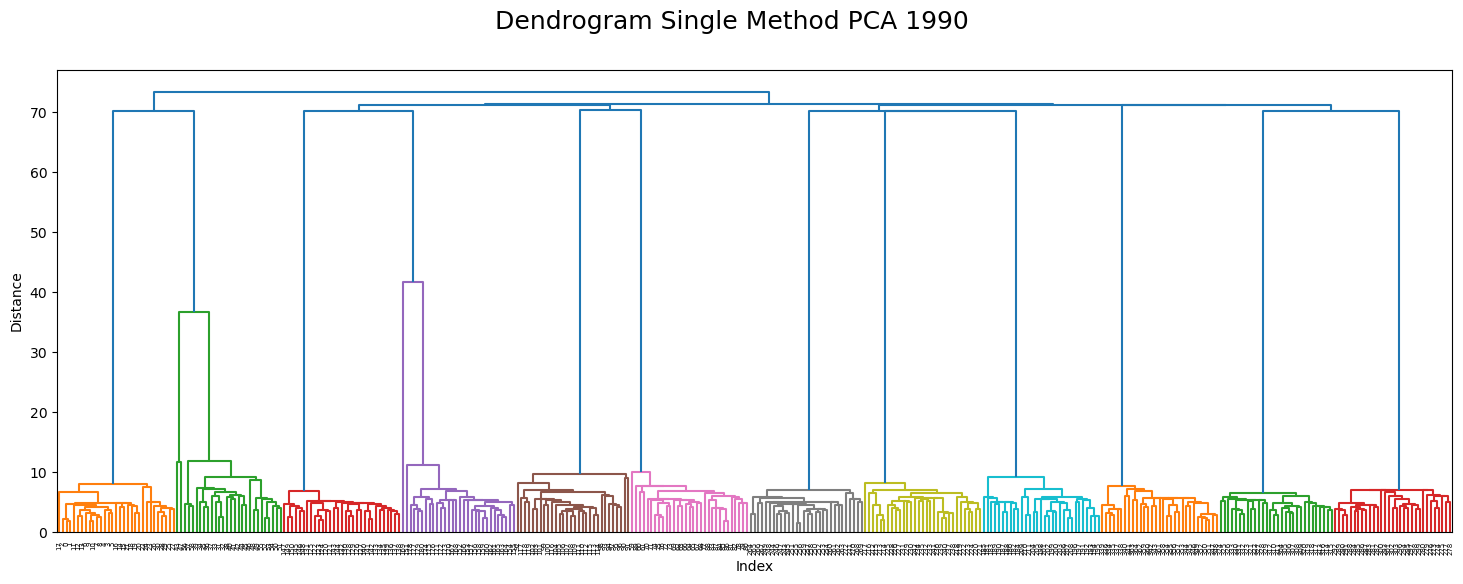

In [15]:
distance_single = linkage(dfPCA1990.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method PCA 1990",fontsize=18)
plt.show()

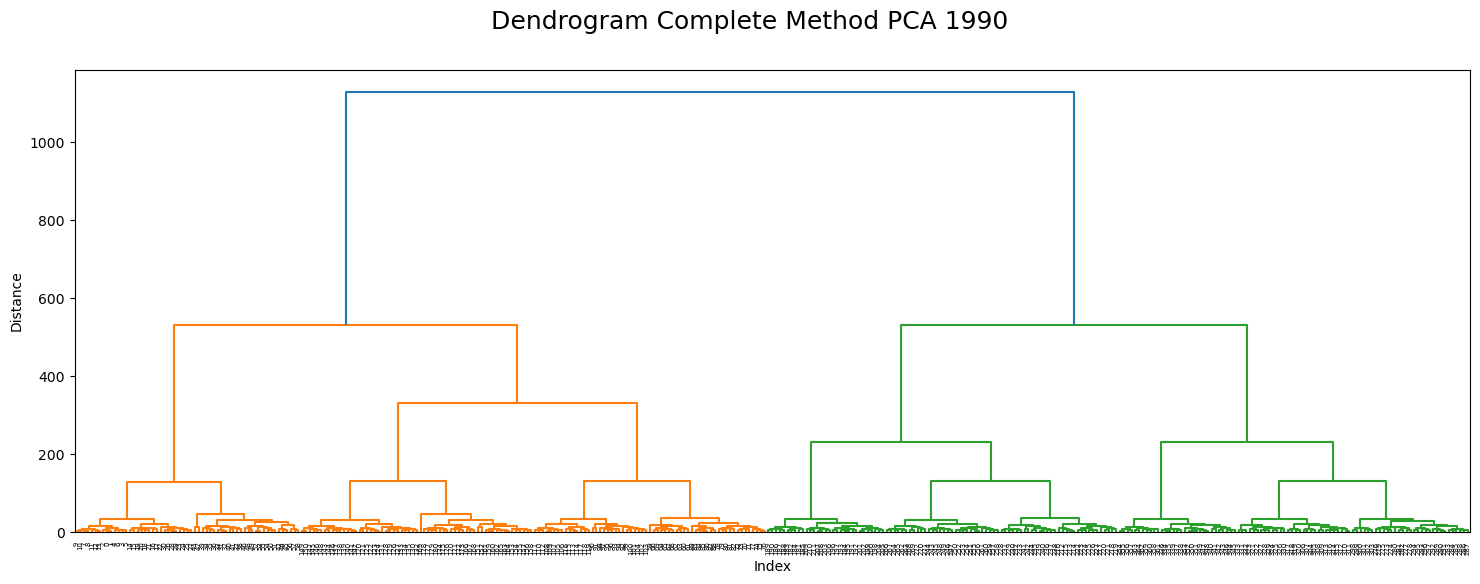

In [16]:
distance_complete = linkage(dfPCA1990.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method PCA 1990",fontsize=18)
plt.show()

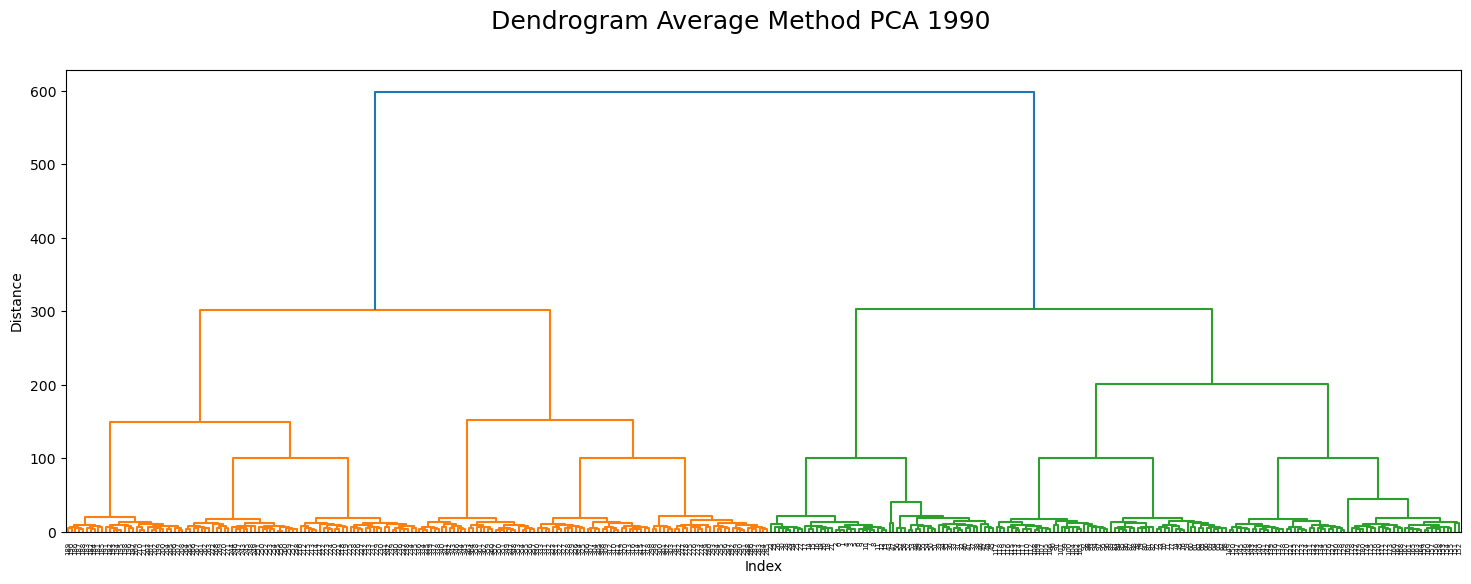

In [17]:
distance_avg = linkage(dfPCA1990.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_avg, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method PCA 1990",fontsize=18)
plt.show()

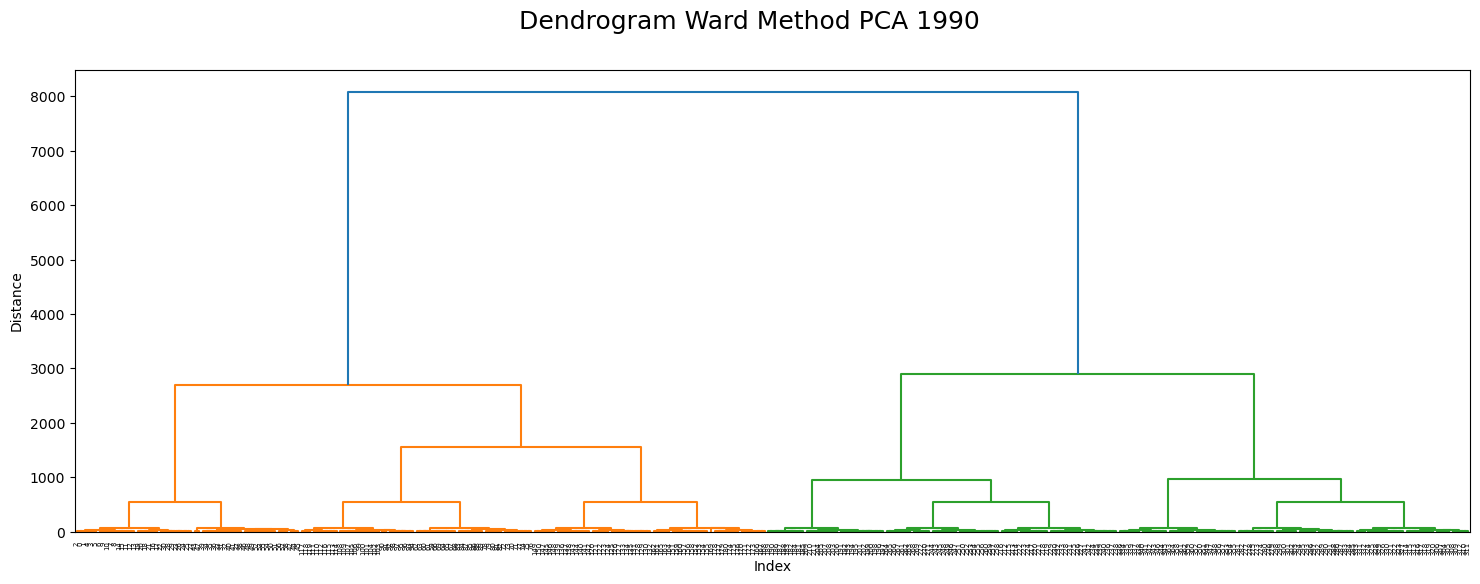

In [18]:
distance_ward = linkage(dfPCA1990.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method PCA 1990",fontsize=18)
plt.show()